#### IMPLEMENT MLP FOR LINEAR DATA


In [1]:
import random as r,csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

'''GENERATE DATA'''
N = 500
filename = 'non-linearly-separable.csv'
with open(filename, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["x1","y1"])
    i = 0
    slope = np.random.uniform(-1,1)
    while(i<N):
        x = np.random.uniform(-100,100)
        y = slope*x+ np.random.uniform(-50*np.random.uniform(0,1),50*np.random.uniform(0,1))
        writer.writerow([str(x),str(y)]); i+=1

In [2]:
'''LOAD DATA'''
# LOADING THE DATA CREATED IN THE ABOVE STEP
df = pd.read_csv(filename)
df.head()

,x1,y1
0,-3.911469,14.597885
1,-8.349757,12.767204
2,-22.455855,-0.396609
3,-20.413053,21.686676
4,-48.829815,-60.779395


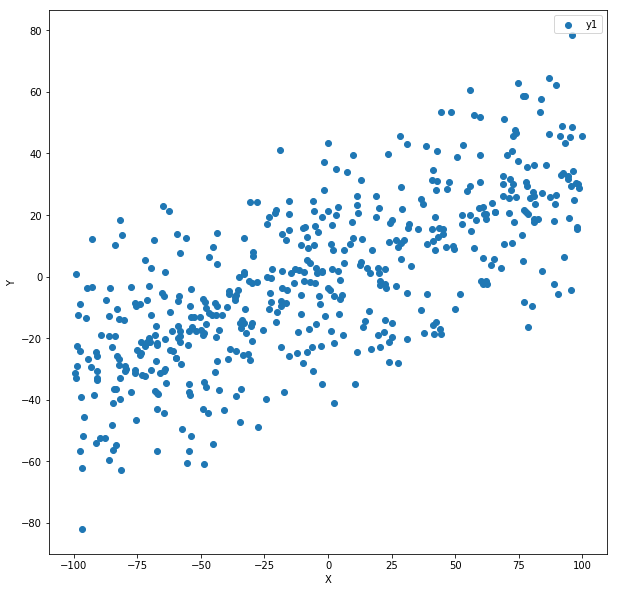

In [3]:
'''VISUALIZING THE GENERATED DATASET'''

plt.rcParams['figure.figsize'] = [10, 10]
plt.scatter(df['x1'],df['y1'])
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [4]:
'''INITIALIZE THE WEIGHT MATRICES WITH RANDOM VALUES'''
N = len(df) # no. of datapoints
h = 2 # nodes in hidden layer
C = 1 # no of classes
d = 1 # input dimensions

    
u1 = np.random.rand(N,h+1) #equivalent to u1[N][h+1]
v1 = np.random.rand(N,h+1)
u2 = np.random.rand(N,C)
v2 = np.random.rand(N,C)

w1 = np.random.rand(h+1,d+1)
w2 = np.random.rand(C,h+1)




          x1         y1  x0
0  -3.911469  14.597885   1
1  -8.349757  12.767204   1
2 -22.455855  -0.396609   1
3 -20.413053  21.686676   1
4 -48.829815 -60.779395   1
         x1        y1  x0
0  0.480104  0.601844   1
1  0.457855  0.590439   1
2  0.387143  0.508425   1
3  0.397383  0.646009   1
4  0.254933  0.132227   1


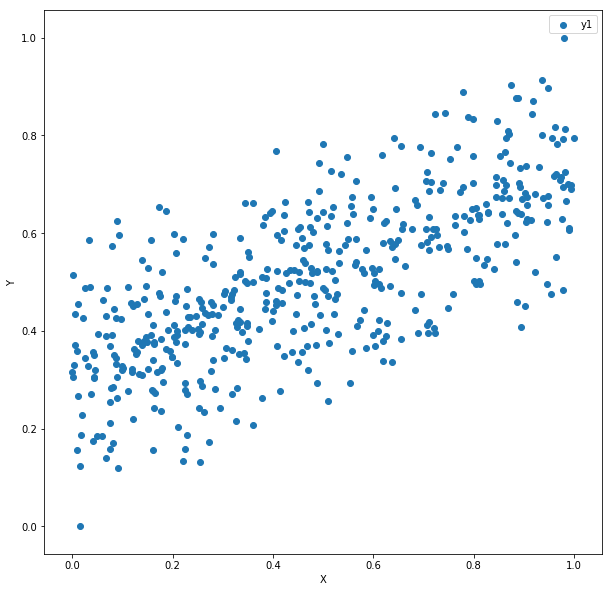

In [5]:
'''PREPROCESSING THE DATA'''

# Appending an extra 1 to all input Xs
df['x0'] = 1
print(df.head())


xmin = min(df['x1']) ; xmax = max(df['x1'])
ymin = min(df['y1']) ; ymax = max(df['y1'])
df['x1'] = (df['x1'] - xmin)/(xmax - xmin) 
df['y1'] = (df['y1'] - ymin)/(ymax - ymin) 
print(df.head())
plt.scatter(df['x1'],df['y1'])
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [6]:
numberOfTrainingSamples = int(0.7*N)
X = df[['x0','x1']].values
y = df[['y1']].values


numberOfTestSamples = N-numberOfTrainingSamples
print('No. of Training samples : ',numberOfTrainingSamples)
print('No. of Test samples : ',numberOfTestSamples)

No. of Training samples :  350
No. of Test samples :  150


In [7]:
'''SET UP FORWARD PROPAGATION'''

import math
def phi(x):
    return 1/(1.0+math.exp(-x))

def dphi(x):
    return phi(x)*(1-phi(x))

def calcU1nj(n,j):
    s = 0
    for i in range(d+1):
        s += w1[j][i]*X[n][i]
    return s

def calcU2nk(n,k):
    s = 0
    for j in range(h+1):
        s += w2[k][j]*v1[n][j]
    return s

In [8]:
'''TRAINING PHASE'''
epoch = 500
eta = 1.0
errors = []
error = 10**5 ; e = 0
for e in range(epoch): # Convergence with presetting no of epochs
    error = 0
    for n in range(numberOfTrainingSamples): 
        for j in range(1,h+1):
            u1[n][j] = calcU1nj(n,j)
            v1[n][j] = phi(u1[n][j])
        err = 0
        for k in range(C):
            u2[n][k] = calcU2nk(n,k)
            v2[n][k] = phi(u2[n][k])
            err += (1/2)*((v2[n][k] - y[n][k])**2)
        
        error += err
        # Backprop
        for k in range(C):
            for j in range(h+1):
                w2[k][j] += eta*(y[n][k]-v2[n][k])*dphi(u2[n][k])*v1[n][j]
        for i in range(d+1):
            for j in range(1,h+1):
                w1[j][i] += eta*dphi(u1[n][j])*X[n][i]*sum([(y[n][k] - v2[n][k])*dphi(u2[n][k])*w2[k][j] for k in range(C)])
    error = error/numberOfTrainingSamples
    if (e)%10 ==0:
        print("Epoch :", e, "In-sample Error : ", error) 
    errors.append(error)
    
print('Final In-sample Error : ',errors[-1])

Epoch : 0 In-sample Error :  0.014036080495473556
Epoch : 10 In-sample Error :  0.006863284910448768
Epoch : 20 In-sample Error :  0.0068745246936123714
Epoch : 30 In-sample Error :  0.006886731141149939
Epoch : 40 In-sample Error :  0.006898720401293028
Epoch : 50 In-sample Error :  0.006909970178487902
Epoch : 60 In-sample Error :  0.0069202412552378635
Epoch : 70 In-sample Error :  0.00692941908064809
Epoch : 80 In-sample Error :  0.006937458390412891
Epoch : 90 In-sample Error :  0.006944384154465555
Epoch : 100 In-sample Error :  0.006950309289023361
Epoch : 110 In-sample Error :  0.0069554279372722955
Epoch : 120 In-sample Error :  0.006959959262492182
Epoch : 130 In-sample Error :  0.006964069347806609
Epoch : 140 In-sample Error :  0.006967834842441715
Epoch : 150 In-sample Error :  0.006971270201660793
Epoch : 160 In-sample Error :  0.006974376816440629
Epoch : 170 In-sample Error :  0.00697717066787757
Epoch : 180 In-sample Error :  0.006979683354816014
Epoch : 190 In-sample 

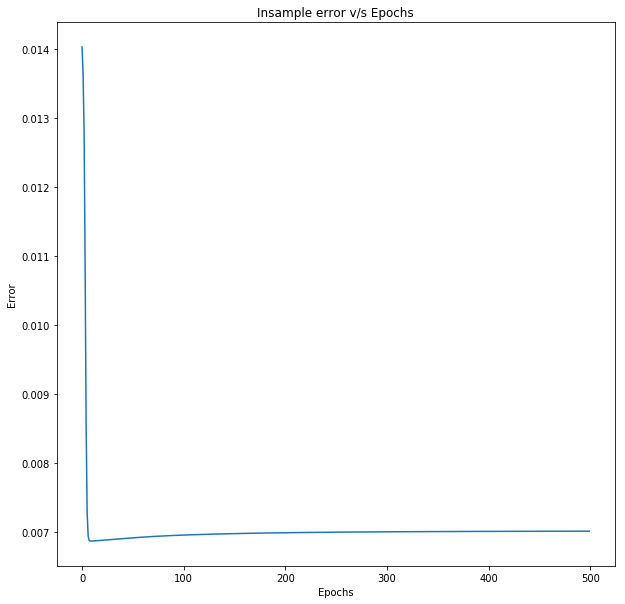

Optimal w1 : 
 [[ 0.00711731  0.77005073]
 [ 4.1167608  -3.47585763]
 [ 0.29165979  3.45016116]]
Optimal w2 : 
 [[-0.09897792 -2.41450462  2.60875148]]


In [9]:
'''VISUALIZE TRAINING RESULTS'''
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Insample error v/s Epochs')
plt.plot(range(len(errors)),errors)
plt.show()
print("Optimal w1 : \n",w1)
print("Optimal w2 : \n",w2)

In [10]:
'''TESTING PHASE'''
testerrors = []
correct = 0
for n in range(numberOfTrainingSamples,N):
    for j in range(1,h+1):
        u1[n][j] = calcU1nj(n,j)
        v1[n][j] = phi(u1[n][j])
    error = 0
    for k in range(C):
        u2[n][k] = calcU2nk(n,k)
        v2[n][k] = phi(u2[n][k])
        error += (1/2)*(v2[n][k] - y[n][k])**2
    
    testerrors.append(error)
    
E_in_MLP = errors[-1]
E_out_MLP = sum(testerrors)/numberOfTestSamples
print('Final In-sample Error : ',E_in_MLP)
print("Out of sample error : ",E_out_MLP)



Final In-sample Error :  0.0070065618625335824
Out of sample error :  0.007205362806449136


#### Now run Linear regression on the same data set to compare

In [11]:
numberOfTrainingSamples = int(0.7*N)
X = df[['x0','x1']].values
y = df[['y1']].values

Xtrain = X[:numberOfTrainingSamples]
ytrain = y[:numberOfTrainingSamples]
Xtest = X[numberOfTrainingSamples:]
ytest = y[numberOfTrainingSamples:]

In [12]:
def findParams(X, y):
    return np.dot(np.dot(np.linalg.inv(np.dot(X.transpose(), X)), X.transpose()), y)

W = findParams(Xtrain,ytrain)
W

array([[0.30325246],
       [0.41924381]])

In [13]:
y_out_pred = np.dot(Xtest,W)
y_in_pred = np.dot(Xtrain,W)
E_in_LR = np.linalg.norm(y_in_pred - ytrain)/len(y_in_pred)
E_out_LR = np.linalg.norm(y_out_pred - ytest)/len(y_out_pred)
print("In-sample Error :",E_in_LR)
print("Out-of-sample Error :",E_out_LR)

In-sample Error : 0.006113482347711135
Out-of-sample Error : 0.009699907138863427


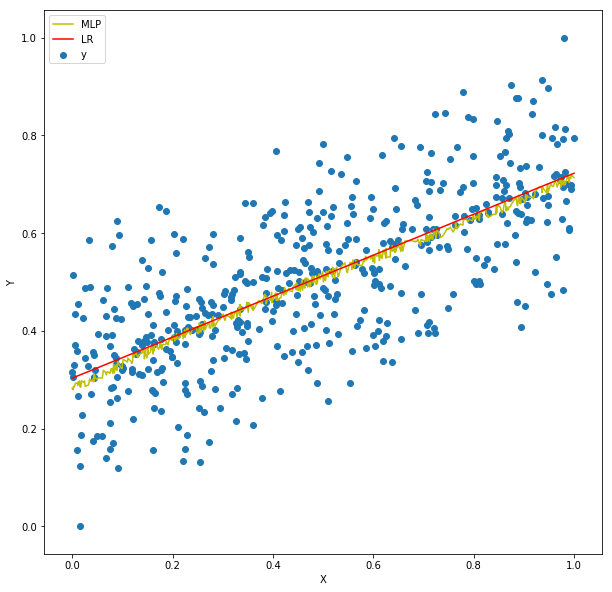

In [14]:
'''TO VISUALIZE THE CURVE GIVEN BY F(X) FOUND BY OUR RESPECTIVE ML-ALGORITHMS'''

def findGeneratedCurveMLP():
    yMLP = []
    for n in range(len(X)): 
        for j in range(1,h+1):
            u1[n][j] = calcU1nj(n,j)
            v1[n][j] = phi(u1[n][j])
        err = 0
        for k in range(C):
            u2[n][k] = calcU2nk(n,k)
            v2[n][k] = phi(u2[n][k])
        yMLP.append(v2[n][0]) # only 1- class
    return yMLP


df = df.sort_values('x1')
X = df[['x0','x1']].values
y = df[['y1']].values.reshape(len(df),)
y_hat_MLP = findGeneratedCurveMLP()
y_hat_LR = np.dot(X,W).reshape(len(df),)



plt.scatter(df['x1'],y,label='y')
plt.plot(df['x1'],y_hat_MLP, c='y' ,label = 'MLP')
plt.plot(df['x1'],y_hat_LR.reshape(len(y_hat_LR)),  c='r',label = 'LR')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [15]:
print('MLP In-sample Error : ',E_in_MLP)
print("MLP Out-of-sample error : ",E_out_MLP)
print("LR In-sample Error :",E_in_LR)
print("LR Out-of-sample Error :",E_out_LR)


MLP In-sample Error :  0.0070065618625335824
MLP Out-of-sample error :  0.007205362806449136
LR In-sample Error : 0.006113482347711135
LR Out-of-sample Error : 0.009699907138863427


###### From  the output we see that the MLP has generalized better than Linear Regression